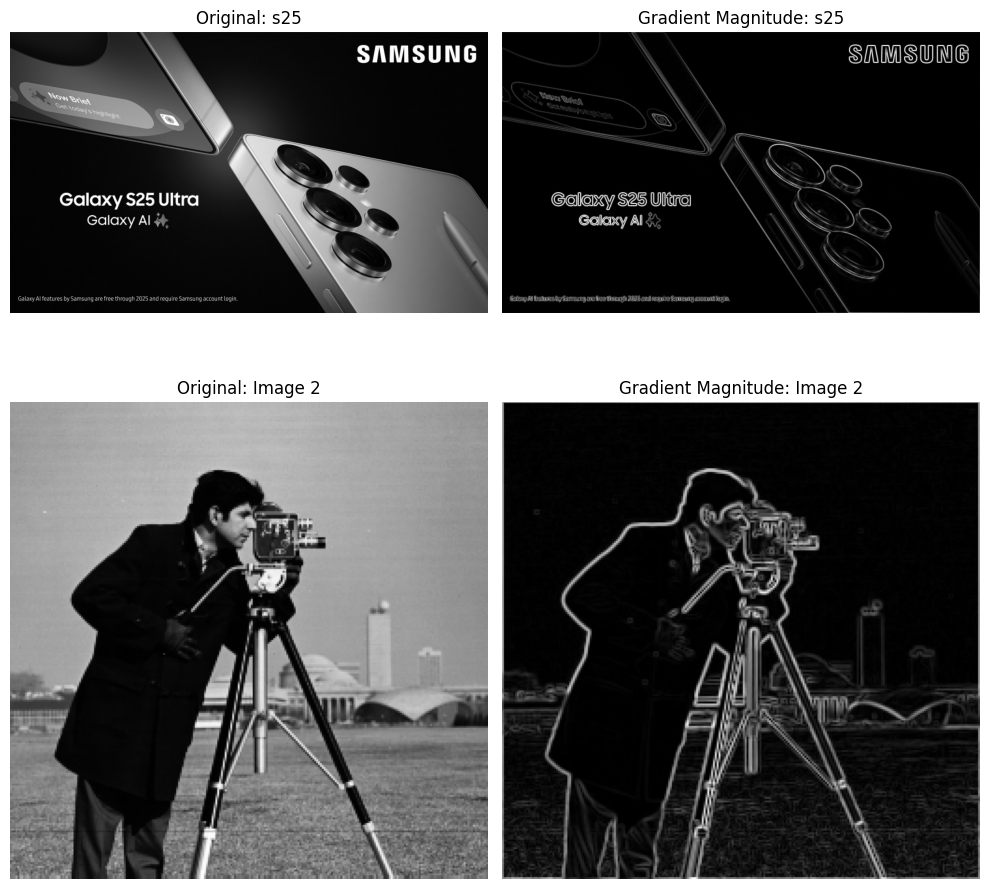

In [37]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt


def convolve(img, kernel):
  """ Used for computing gradient mag"""
  h,w = img.shape
  k_w, k_h = kernel.shape
  #kernel is square matrix
  pad_h, pad_w= k_h//2, k_w//2

  padded_image = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")



  ret = np.zeros_like(img, dtype=np.float32)

  for i in range(h):
        for j in range(w):
            region = padded_image[i:i + k_h, j:j + k_w]
            if region.shape == kernel.shape:
              ret[i, j] = np.dot(kernel.ravel(), region.ravel())
  return ret



def gradient_mag(img):
  """
  reference: https://www.analyticsvidhya.com/blog/2022/07/beginners-guide-to-image-gradient/
  """
  sobelX = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype="float32")

  sobelY = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype="float32")

  gx = convolve(img, sobelX)
  gy = convolve(img, sobelY)

  gradient = np.sqrt(gx**2 + gy**2)

  gradient = (gradient / gradient.max()) * 255

  return gradient.astype("uint8")




def visualize_images(images, gradients, titles):
    """
    show original vs gradient
    """
    num_images = len(images)
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

    for i in range(num_images):
        axes[i, 0].imshow(images[i], cmap="gray")
        axes[i, 0].set_title(f"Original: {titles[i]}")
        axes[i, 0].axis("off")


        axes[i, 1].imshow(gradients[i], cmap="gray")
        axes[i, 1].set_title(f"Gradient Magnitude: {titles[i]}")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()



image1 = cv2.imread("s25.jpeg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)


gradient_img1 = gradient_mag(image1)
gradient_img2 = gradient_mag(image2)


visualize_images(
    images=[image1, image2],
    gradients=[gradient_img1, gradient_img2],
    titles=["s25", "Image 2"]
)